In [47]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("sale_data.csv")
data.date = pd.to_datetime(data.date, format="%d/%m/%Y")
data.price = data.price.apply(lambda x: int(x.replace("$", "").replace(",", "")) if x != "–" else 0)
data.type.unique()
data = data[(data.type == ("Single residential dwelling" or "Single residential dwelling..." or "Multiple unit dwelling" or "Medium density dwelling" or "For residential purposes")) & (data.price > 0) & (data.date < pd.to_datetime("2021-01-01"))]
data.sort_values("date", inplace=True)
data = data[["suburb", "date", "price"]]
data.at[112806, "price"] = 2500000
data.to_csv("chart_data.csv", index=False)

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("chart_data.csv", parse_dates=["date"])
data["month"] = data.date.apply(lambda x: pd.to_datetime(f"{x.year}-{x.month}-01"))
data

,suburb,date,price,month
0,Forde,2011-01-04,268000,2011-01-01
1,Curtin,2011-01-04,290000,2011-01-01
2,Casey,2011-01-04,221000,2011-01-01
3,Monash,2011-01-05,440000,2011-01-01
4,Gordon,2011-01-05,600000,2011-01-01
...,...,...,...,...
44340,Throsby,2020-12-24,390000,2020-12-01
44341,Chifley,2020-12-24,903000,2020-12-01
44342,Harrison,2020-12-24,666000,2020-12-01
44343,Bonython,2020-12-24,720000,2020-12-01


<AxesSubplot:xlabel='month'>

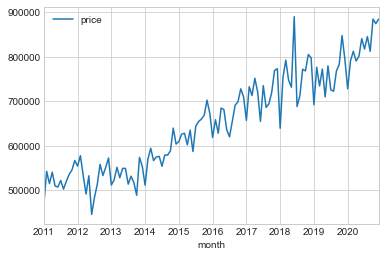

In [86]:
data.groupby("month").mean().plot()

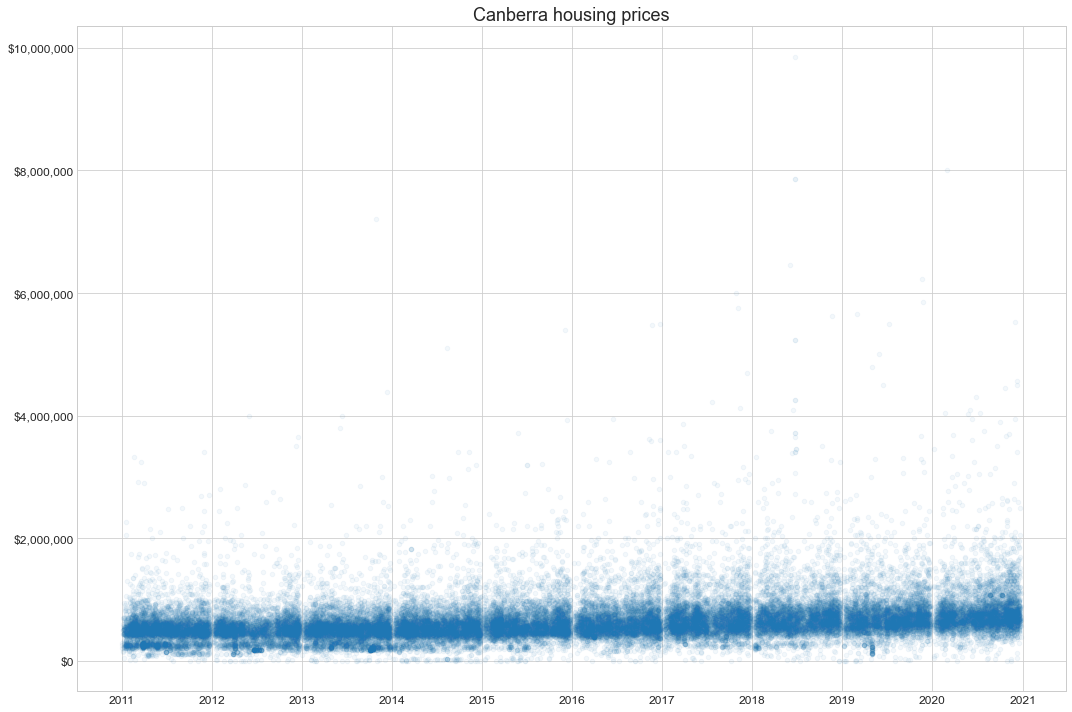

In [106]:
plt.style.use("seaborn-whitegrid")
ax = data.plot.scatter("date", "price", figsize=(15, 10), alpha=.05)
ax.yaxis.set_major_formatter(lambda x, p: f"${x:,.0f}")
ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)
ax.tick_params(axis="both", labelsize=12)
# plt.ylim((0, 3000000))
plt.title("Canberra housing prices", fontsize=18)
plt.tight_layout()
plt.savefig("./housing_prices.png")
plt.show()

In [131]:
million_data = data[data.price > 999999]
million_data = million_data.groupby(["month", "suburb"]).count()
million_data = million_data.reset_index()[["month", "suburb", "price"]]
million_data.columns = ["month", "suburb", "count"]
million_data.to_csv("million_data.csv", index=False)

# plt.style.use("seaborn-whitegrid")
# ax = million_data.plot.scatter("month", "count", figsize=(15, 10))
# # ax.yaxis.set_major_formatter(lambda x, p: f"${x:,.0f}")
# ax.yaxis.label.set_visible(False)
# ax.xaxis.label.set_visible(False)
# ax.tick_params(axis="both", labelsize=12)
# # plt.title("Canberra housing prices", fontsize=18)
# plt.tight_layout()
# plt.show()